In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

### b) Load the dataset

In [2]:
dataset_path = "creditcard.csv"
df = pd.read_csv(dataset_path)

###  Visualize the data and show the data headers

In [3]:
print(df.head())
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 



## c) Preprocess the dataset
### i. Check for duplicate data

In [4]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 705


### ii Remove such colums which are not important. For example: Time

In [5]:
df = df.drop(['Time'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194189,-2.020698,1.776253,-1.065479,-2.769201,-0.064483,-0.870269,-0.005058,1.350026,0.012971,-1.058888,...,-0.247153,-1.029805,-0.064710,-1.083659,0.132321,0.436510,0.046391,0.073014,1.00,0.0
194190,2.043725,-0.099641,-1.174763,0.223753,0.079134,-0.704267,0.080115,-0.172561,0.289565,0.240276,...,-0.258043,-0.637271,0.287931,-0.333452,-0.282316,0.198073,-0.074182,-0.073311,0.89,0.0
194191,1.842498,-0.752856,1.137319,2.390623,-1.447940,0.953968,-1.573333,0.401153,1.289612,0.709997,...,0.004503,0.454859,0.258029,0.038701,-0.774425,2.331048,-0.083683,-0.050854,21.71,0.0
194192,2.168959,-1.157163,-1.043238,-1.217888,-0.472766,0.536149,-1.216259,0.217502,0.057792,0.915301,...,0.304777,0.838372,0.036949,-0.342829,-0.071414,-0.070816,-0.004231,-0.061583,24.99,0.0


### iii. Separate the dataset into feature and target columns

In [6]:

X = df.drop(['Class'], axis=1)
y = df['Class']
X
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
194189    0.0
194190    0.0
194191    0.0
194192    0.0
194193    NaN
Name: Class, Length: 193489, dtype: float64

### iv. Scale the dataset using standard scaling

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.66733218, -0.04700383,  1.52990672, ...,  0.33789328,
        -0.07691684,  0.24134443],
       [ 0.69403938,  0.16290577, -0.12945265, ..., -0.03160716,
         0.03873263, -0.34926674],
       [-0.66655694, -0.83192742,  0.99556476, ..., -0.15180812,
        -0.20201023,  1.1620113 ],
       ...,
       [ 1.04117109, -0.46819212,  0.5503199 , ..., -0.22524648,
        -0.17324698, -0.27281248],
       [ 1.21534572, -0.71859076, -0.97648629, ..., -0.01928787,
        -0.20793029, -0.25962793],
       [-0.10270251,  0.37216236, -0.29341211, ...,         nan,
                nan,         nan]])



### v. Split the dataset into training and testing sets (80%-20%)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## d) Plot histograms/heatmaps to understand the values of each variable

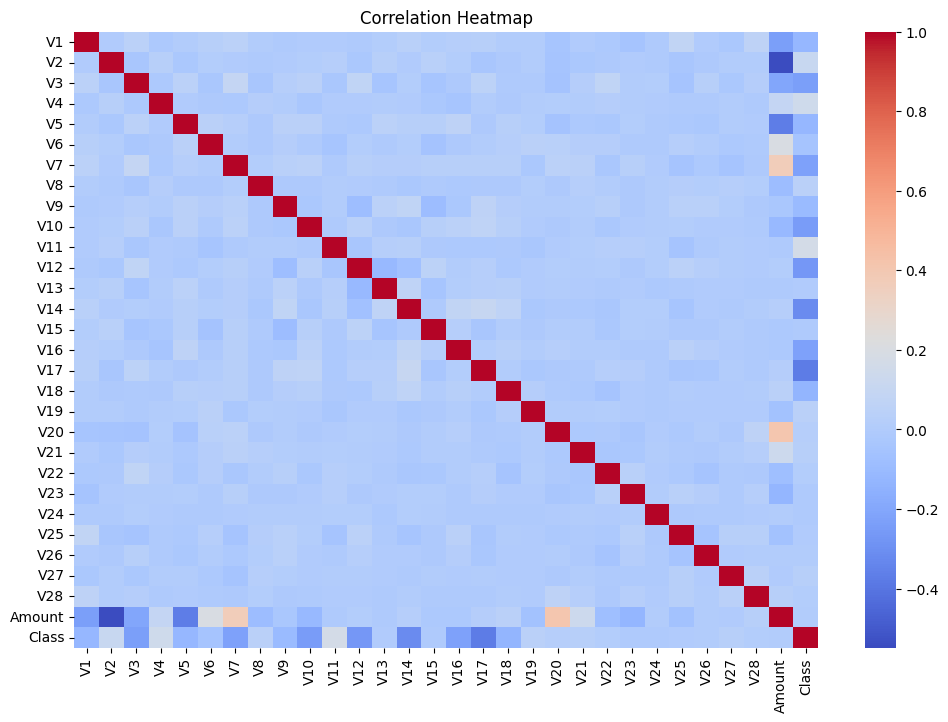

In [9]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


## e) Train the model using logistic regression

In [10]:

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


ValueError: ignored

## f) Obtain the training accuracy

In [11]:

train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_accuracy)


NotFittedError: ignored

## g) Test the model and obtain testing accuracy

In [ ]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Testing Accuracy:", test_accuracy)

## h) Generate confusion matrix, precision, and recall

In [ ]:
conf_matrix = confusion_matrix(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)